# Annual Returns & Monthly Returns

In [90]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [91]:
# input
symbol = 'PANW'
start = '2007-01-01'
end = '2024-01-11'

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400


In [92]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-04,286.000000,287.480011,282.899994,283.299988,283.299988,2542700
2024-01-05,284.190002,286.450012,281.839996,282.929993,282.929993,1857100
2024-01-08,283.519989,290.739990,283.500000,289.500000,289.500000,2915500
2024-01-09,287.609985,301.000000,286.899994,300.420013,300.420013,3651200
2024-01-10,305.200012,316.489990,305.100006,316.089996,316.089996,5077200


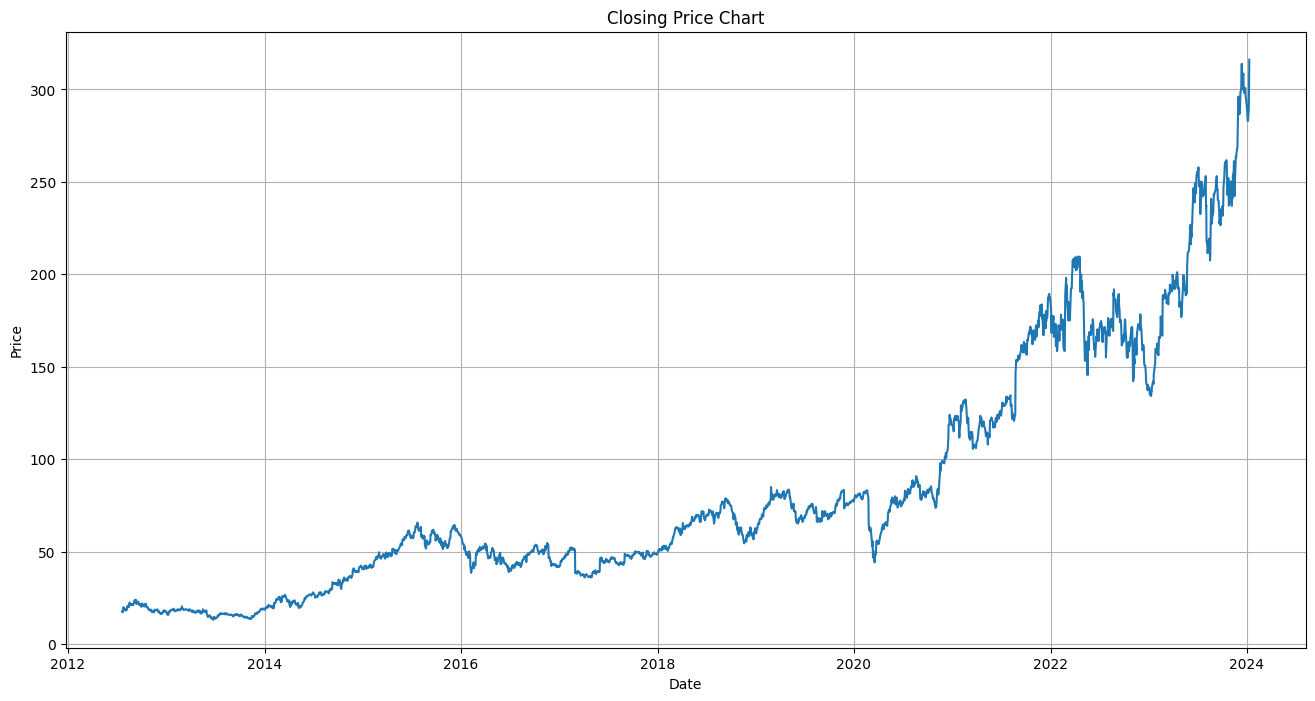

In [93]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [120]:
monthly = dataset.asfreq('BM')
monthly['Returns'] = dataset['Adj Close'].pct_change().dropna()
monthly.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2012-07-31,18.333332,19.046667,17.403334,19.046667,19.046667,856200.0,0.038909
2012-08-31,21.493334,21.526667,21.033333,21.459999,21.459999,276900.0,0.014977
2012-09-28,21.666668,21.770000,20.423332,20.523333,20.523333,3195000.0,-0.053788
2012-10-31,18.799999,19.063334,18.000000,18.326668,18.326668,3398700.0,-0.023446
2012-11-30,18.683332,18.683332,17.719999,18.139999,18.139999,4417200.0,-0.025953


In [95]:
monthly['Month_Name'] = monthly.index.strftime("%b")
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")

In [96]:
import calendar
import datetime

monthly = monthly.reset_index()
monthly['Month'] = monthly["Date"].dt.month

In [97]:
monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
0,2012-07-31,18.333332,19.046667,17.403334,19.046667,19.046667,856200.0,0.038909,Jul,Jul-2012,7
1,2012-08-31,21.493334,21.526667,21.033333,21.459999,21.459999,276900.0,0.014977,Aug,Aug-2012,8
2,2012-09-28,21.666668,21.770000,20.423332,20.523333,20.523333,3195000.0,-0.053788,Sep,Sep-2012,9
3,2012-10-31,18.799999,19.063334,18.000000,18.326668,18.326668,3398700.0,-0.023446,Oct,Oct-2012,10
4,2012-11-30,18.683332,18.683332,17.719999,18.139999,18.139999,4417200.0,-0.025953,Nov,Nov-2012,11


In [118]:
monthly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month,ReturnsPositive
133,19600.0,239.580002,243.830002,239.580002,243.300003,243.300003,3762300.0,0.022699,Aug,Aug-2023,8,True
134,19629.0,238.000000,238.339996,234.039993,234.440002,234.440002,2247600.0,-0.003146,Sep,Sep-2023,9,False
135,19661.0,242.509995,244.039993,238.119995,243.020004,243.020004,2113000.0,0.018738,Oct,Oct-2023,10,True
136,19691.0,288.690002,296.160004,287.029999,295.089996,295.089996,8929700.0,0.021391,Nov,Nov-2023,11,True
137,19720.0,296.709991,296.720001,291.950012,294.880005,294.880005,2067300.0,-0.002368,Dec,Dec-2023,12,False


In [99]:
monthly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
133,2023-08-31,239.580002,243.830002,239.580002,243.300003,243.300003,3762300.0,0.022699,Aug,Aug-2023,8
134,2023-09-29,238.000000,238.339996,234.039993,234.440002,234.440002,2247600.0,-0.003146,Sep,Sep-2023,9
135,2023-10-31,242.509995,244.039993,238.119995,243.020004,243.020004,2113000.0,0.018738,Oct,Oct-2023,10
136,2023-11-30,288.690002,296.160004,287.029999,295.089996,295.089996,8929700.0,0.021391,Nov,Nov-2023,11
137,2023-12-29,296.709991,296.720001,291.950012,294.880005,294.880005,2067300.0,-0.002368,Dec,Dec-2023,12


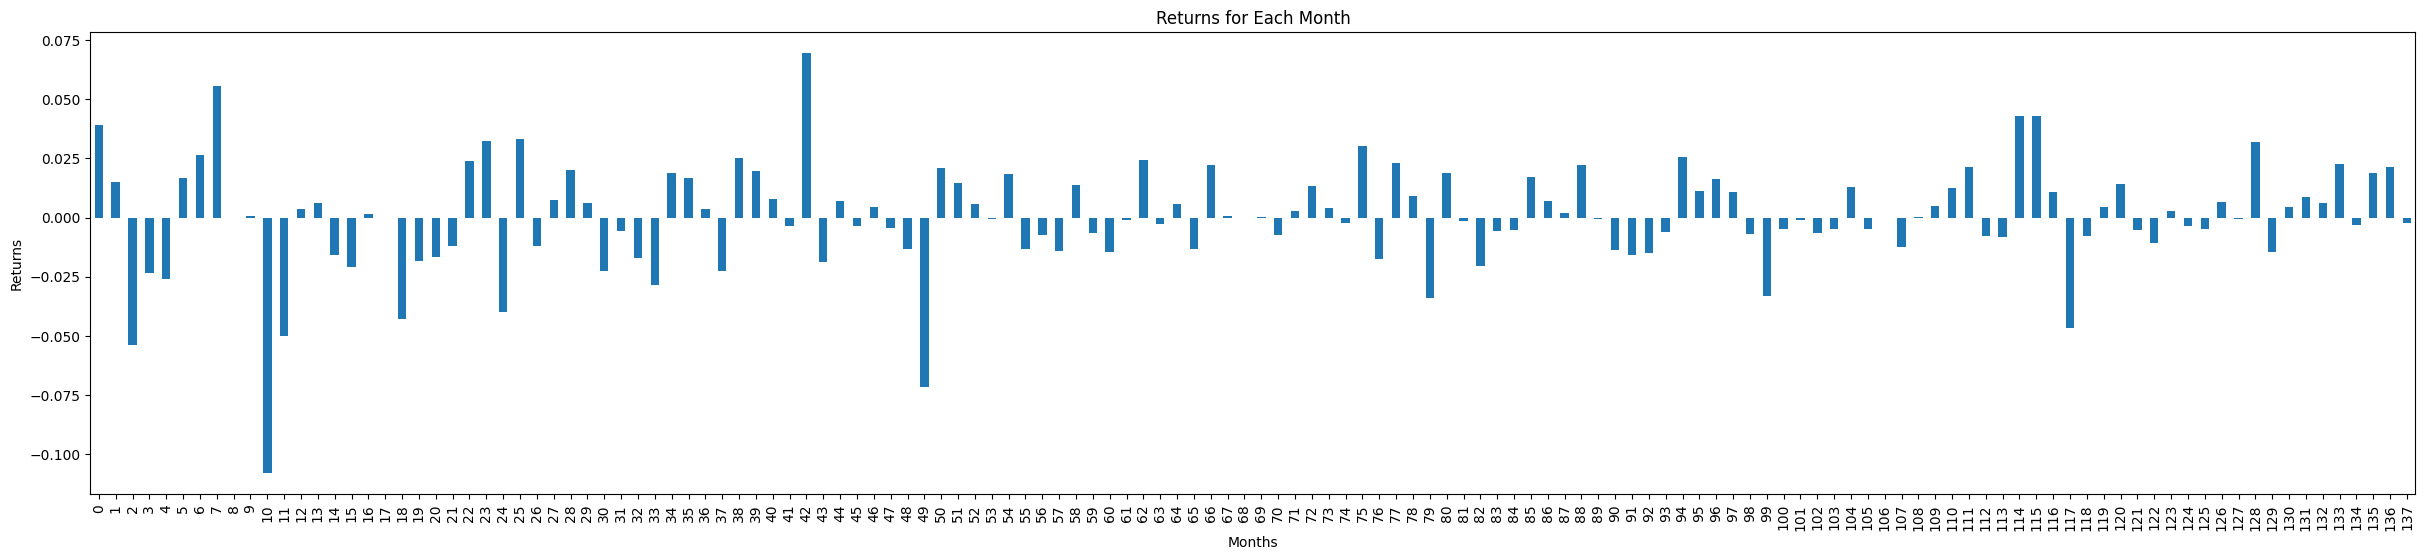

In [100]:
monthly['Returns'].plot(kind='bar', figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month")
plt.show()

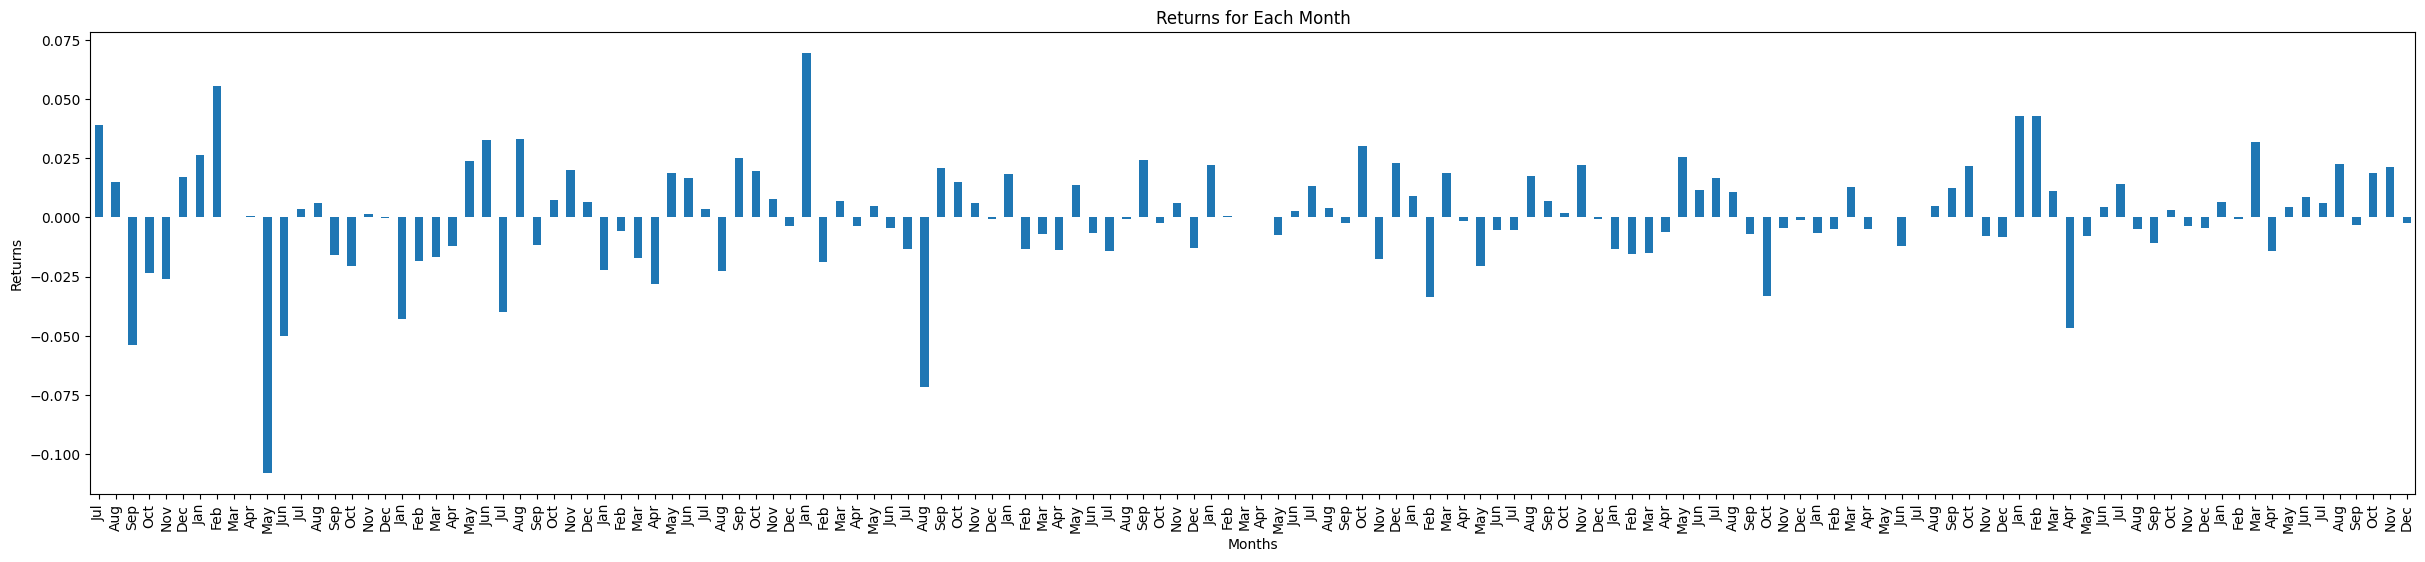

In [101]:
monthly['Returns'].plot(kind='bar', figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month")
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [102]:
from matplotlib import dates as mdates
import datetime as dt

monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)

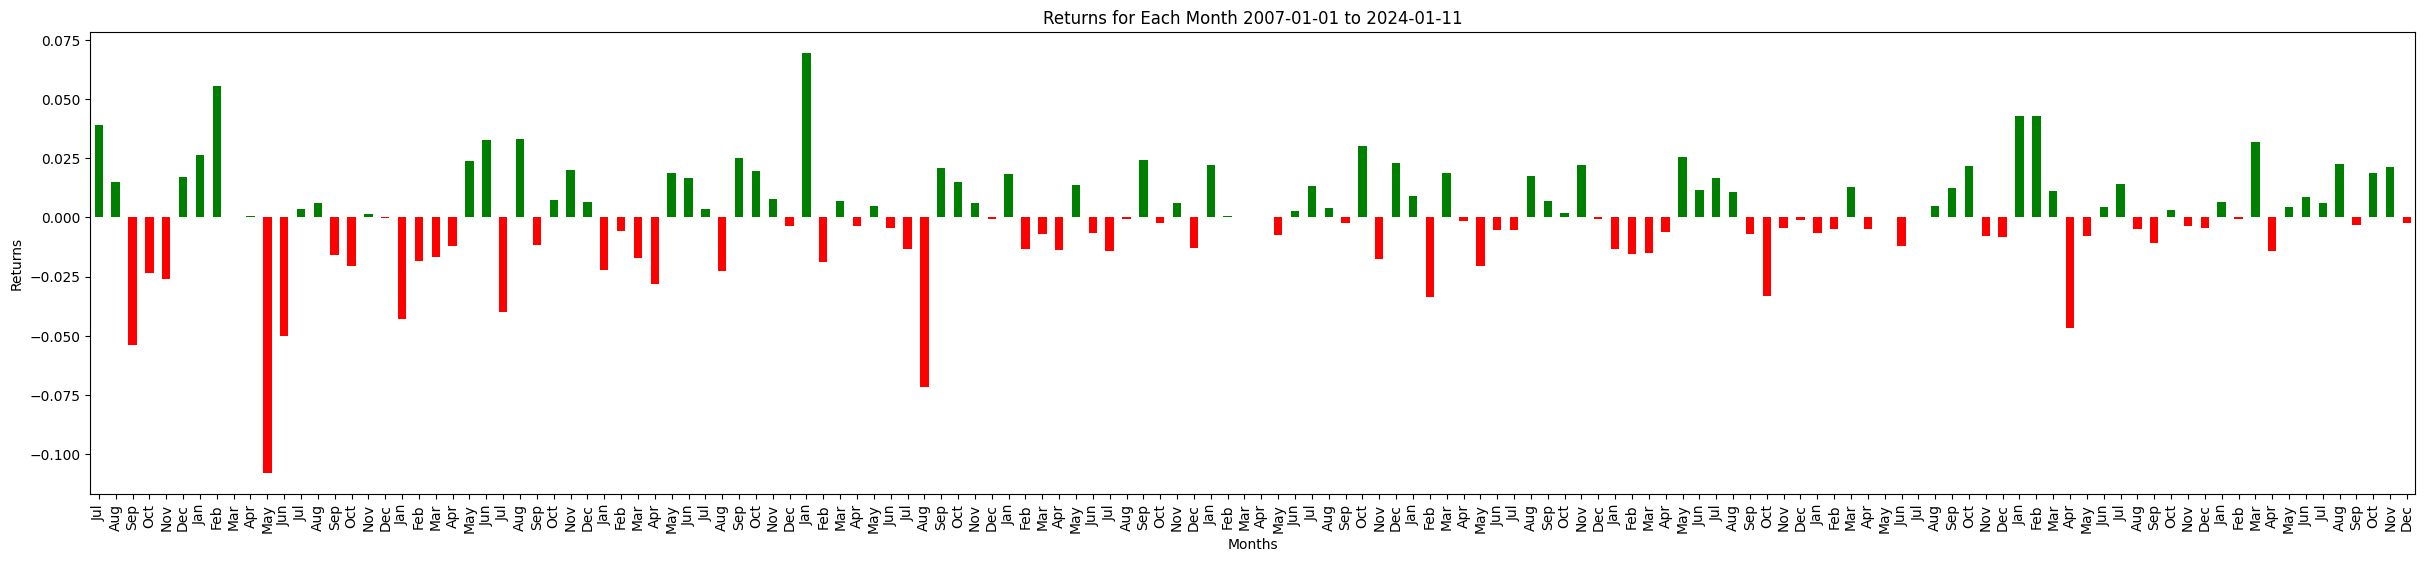

In [103]:
colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month " + start + ' to ' + end)
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [104]:
yearly = dataset.asfreq('BY')
yearly['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [105]:
yearly

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2012-12-31,17.623333,17.896667,17.326668,17.840000,17.840000,1041000,0.016911
2013-12-31,19.123333,19.200001,19.046667,19.156668,19.156668,1279800,-0.000348
2014-12-31,40.639999,41.509998,40.639999,40.856667,40.856667,2152800,0.006322
2015-12-31,58.799999,59.200001,58.509998,58.713333,58.713333,2930400,-0.003677
2016-12-30,41.919998,42.130001,41.529999,41.683334,41.683334,2858100,-0.000639
2017-12-29,48.889999,48.939999,48.306667,48.313332,48.313332,1434900,-0.013141
2018-12-31,61.759998,62.830002,61.400002,62.783333,62.783333,3749400,0.022919
2019-12-31,77.046669,77.443336,76.730003,77.083336,77.083336,1460700,-0.000778
2020-12-31,119.000000,119.623337,117.673332,118.463333,118.463333,3363000,-0.001124


In [106]:
yearly = yearly.reset_index()

In [107]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2012-12-31,17.623333,17.896667,17.326668,17.840000,17.840000,1041000,0.016911
1,2013-12-31,19.123333,19.200001,19.046667,19.156668,19.156668,1279800,-0.000348
2,2014-12-31,40.639999,41.509998,40.639999,40.856667,40.856667,2152800,0.006322
3,2015-12-31,58.799999,59.200001,58.509998,58.713333,58.713333,2930400,-0.003677
4,2016-12-30,41.919998,42.130001,41.529999,41.683334,41.683334,2858100,-0.000639
5,2017-12-29,48.889999,48.939999,48.306667,48.313332,48.313332,1434900,-0.013141
6,2018-12-31,61.759998,62.830002,61.400002,62.783333,62.783333,3749400,0.022919
7,2019-12-31,77.046669,77.443336,76.730003,77.083336,77.083336,1460700,-0.000778
8,2020-12-31,119.000000,119.623337,117.673332,118.463333,118.463333,3363000,-0.001124
9,2021-12-31,187.139999,188.306671,185.406662,185.586670,185.586670,1422900,-0.008300


In [108]:
yearly['Years'] = yearly['Date'].dt.year

In [109]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years
0,2012-12-31,17.623333,17.896667,17.326668,17.840000,17.840000,1041000,0.016911,2012
1,2013-12-31,19.123333,19.200001,19.046667,19.156668,19.156668,1279800,-0.000348,2013
2,2014-12-31,40.639999,41.509998,40.639999,40.856667,40.856667,2152800,0.006322,2014
3,2015-12-31,58.799999,59.200001,58.509998,58.713333,58.713333,2930400,-0.003677,2015
4,2016-12-30,41.919998,42.130001,41.529999,41.683334,41.683334,2858100,-0.000639,2016
5,2017-12-29,48.889999,48.939999,48.306667,48.313332,48.313332,1434900,-0.013141,2017
6,2018-12-31,61.759998,62.830002,61.400002,62.783333,62.783333,3749400,0.022919,2018
7,2019-12-31,77.046669,77.443336,76.730003,77.083336,77.083336,1460700,-0.000778,2019
8,2020-12-31,119.000000,119.623337,117.673332,118.463333,118.463333,3363000,-0.001124,2020
9,2021-12-31,187.139999,188.306671,185.406662,185.586670,185.586670,1422900,-0.008300,2021


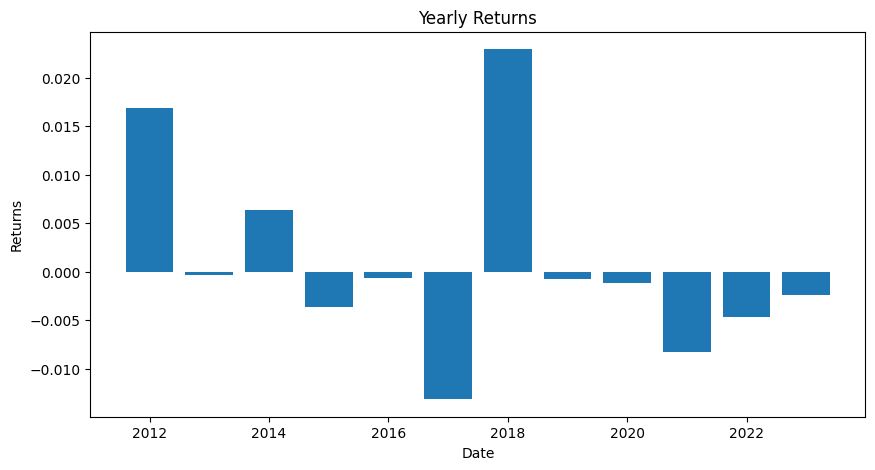

In [110]:
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [111]:
from matplotlib import dates as mdates
import datetime as dt

yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

In [112]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years,ReturnsPositive
0,15705.0,17.623333,17.896667,17.326668,17.840000,17.840000,1041000,0.016911,2012,True
1,16070.0,19.123333,19.200001,19.046667,19.156668,19.156668,1279800,-0.000348,2013,False
2,16435.0,40.639999,41.509998,40.639999,40.856667,40.856667,2152800,0.006322,2014,True
3,16800.0,58.799999,59.200001,58.509998,58.713333,58.713333,2930400,-0.003677,2015,False
4,17165.0,41.919998,42.130001,41.529999,41.683334,41.683334,2858100,-0.000639,2016,False
5,17529.0,48.889999,48.939999,48.306667,48.313332,48.313332,1434900,-0.013141,2017,False
6,17896.0,61.759998,62.830002,61.400002,62.783333,62.783333,3749400,0.022919,2018,True
7,18261.0,77.046669,77.443336,76.730003,77.083336,77.083336,1460700,-0.000778,2019,False
8,18627.0,119.000000,119.623337,117.673332,118.463333,118.463333,3363000,-0.001124,2020,False
9,18992.0,187.139999,188.306671,185.406662,185.586670,185.586670,1422900,-0.008300,2021,False


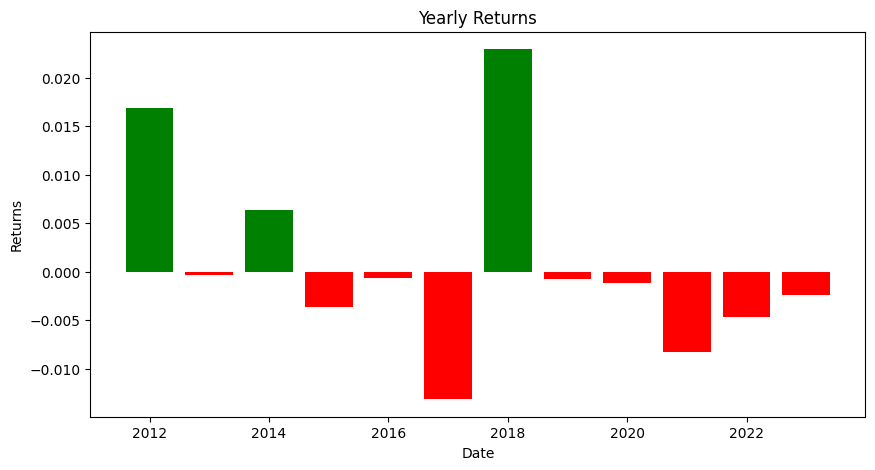

In [113]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [114]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [115]:
yearly_returns_avg = dataset['Returns'].groupby([dataset.index.year]).mean()

In [116]:
yearly_returns_avg

Date
2012    0.000521
2013    0.000551
2014    0.003401
2015    0.001641
2016   -0.000981
2017    0.000889
2018    0.001228
2019    0.000983
2020    0.002084
2021    0.002013
2022   -0.000673
2023    0.003282
2024    0.010291
Name: Returns, dtype: float64

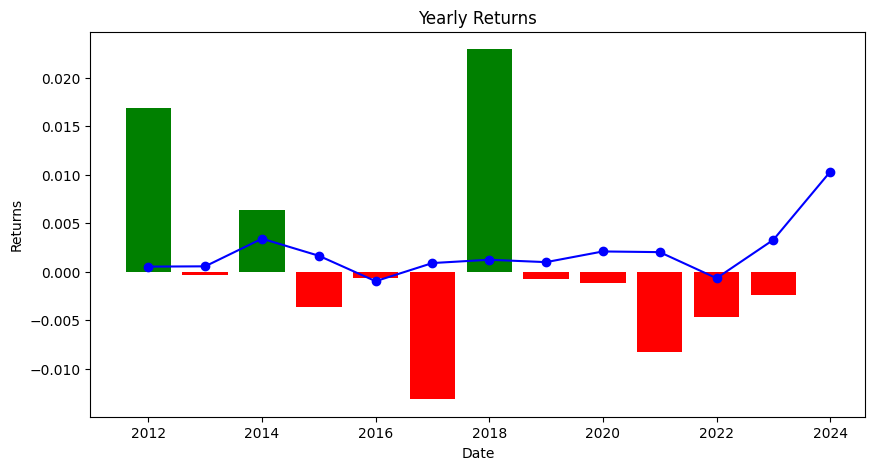

In [117]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()